FINAL PROJECT

NAMES: KEADON HARRISON & EMMANUEL NNADI

BANK CHURN PREDICTION

The Business Problem is that we are trying to predict the churn. We will go into the EDA then go further in the experimentation of different models.

In [1]:
import pandas as pd

df = pd.read_csv('/content/Dataset 3.csv')

In [46]:
rows, cols = df.shape
print(f"There are {rows} rows, and {cols} columns in this dataframe\n")
print("First few rows of the dataset:")
df.head(3)

There are 175028 rows, and 24 columns in this dataframe

First few rows of the dataset:


Surname  CreditScore   Age  Tenure  Balance  NumOfProducts  HasCrCard  \
0     2023        668.0  33.0     3.0      0.0            2.0          1   
1     2024        627.0  33.0     1.0      0.0            2.0          1   
2     1236        678.0  40.0    10.0      0.0            2.0          1   

   IsActiveMember  EstimatedSalary  Exited  ...  Surname_tfidf_4  France  \
0               0        181449.97       0  ...         0.000007       1   
1               1         49503.50       0  ...         0.000002       1   
2               0        184866.69       0  ...         0.015069       1   

   Germany  Spain  Gender  Mem__no__Products  Cred_Bal_Sal  Bal_sal  \
0        0      0       1                0.0           0.0      0.0   
1        0      0       1                2.0           0.0      0.0   
2        0      0       1                0.0           0.0      0.0   

   Tenure_Age  Age_Tenure_product  
0    0.090909                99.0  
1    0.030303                33.0  
2    0.250000               400.0  

[3 rows x 24 columns]

In [47]:
df.shape

(175028, 24)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175028 entries, 0 to 175027
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Surname             175028 non-null  int64  
 1   CreditScore         175028 non-null  float64
 2   Age                 175028 non-null  float64
 3   Tenure              175028 non-null  float64
 4   Balance             175028 non-null  float64
 5   NumOfProducts       175028 non-null  float64
 6   HasCrCard           175028 non-null  int64  
 7   IsActiveMember      175028 non-null  int64  
 8   EstimatedSalary     175028 non-null  float64
 9   Exited              175028 non-null  int64  
 10  Surname_tfidf_0     175028 non-null  float64
 11  Surname_tfidf_1     175028 non-null  float64
 12  Surname_tfidf_2     175028 non-null  float64
 13  Surname_tfidf_3     175028 non-null  float64
 14  Surname_tfidf_4     175028 non-null  float64
 15  France              175028 non-nul

In [4]:
df.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

In [5]:
df.isnull().sum()

Surname               0
CreditScore           0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Surname_tfidf_0       0
Surname_tfidf_1       0
Surname_tfidf_2       0
Surname_tfidf_3       0
Surname_tfidf_4       0
France                0
Germany               0
Spain                 0
Female                0
Male                  0
Mem__no__Products     0
Cred_Bal_Sal          0
Bal_sal               0
Tenure_Age            0
Age_Tenure_product    0
dtype: int64

In [6]:
df.shape

(175028, 25)

##EDA

In [30]:
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pyplot as plt
import warnings

# Calculate the count of customers in each churn category
churn_counts = df['Exited'].value_counts()

# Create a bar plot
data = [go.Bar(x=['Active', 'Left'], y=churn_counts.values)]

# Layout for the plot
layout = go.Layout(title='Customer Churn',
                   xaxis=dict(title='Churn Status'),
                   yaxis=dict(title='Number of Customers'))

# Create figure
fig = go.Figure(data=data, layout=layout)

# Plot the figure
iplot(fig)

In [32]:
df.drop(columns=['Female'], inplace=True) #dropping the female column
df.rename(columns={'Male': 'Gender'}, inplace=True) # renaming the male column to gender and encapsulating all values

df.head(10)

Surname  CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0     2023        668.0  33.0     3.0       0.00            2.0          1   
1     2024        627.0  33.0     1.0       0.00            2.0          1   
2     1236        678.0  40.0    10.0       0.00            2.0          1   
3     1362        581.0  34.0     2.0  148882.54            1.0          1   
4      491        716.0  33.0     5.0       0.00            2.0          1   
5      984        588.0  36.0     4.0  131778.58            1.0          1   
6      436        593.0  30.0     8.0  144772.69            1.0          1   
7      543        678.0  37.0     1.0  138476.41            1.0          1   
8     1669        676.0  43.0     4.0       0.00            2.0          1   
9      427        583.0  40.0     4.0   81274.33            1.0          1   

   IsActiveMember  EstimatedSalary  Exited  ...  Surname_tfidf_4  France  \
0               0        181449.97       0  ...         0.000007       1   
1               1         49503.50       0  ...         0.000002       1   
2               0        184866.69       0  ...         0.015069       1   
3               1         84560.88       0  ...         0.016076       1   
4               1         15068.83       0  ...         0.000002       0   
5               0        136024.31       1  ...         0.021604       0   
6               0         29792.11       0  ...        -0.447755       1   
7               0        106851.60       0  ...        -0.000001       0   
8               0        142917.13       0  ...         0.007488       1   
9               1        170843.07       0  ...         0.000011       0   

   Germany  Spain  Gender  Mem__no__Products  Cred_Bal_Sal   Bal_sal  \
0        0      0       1                0.0      0.000000  0.000000   
1        0      0       1                2.0      0.000000  0.000000   
2        0      0       1                0.0      0.000000  0.000000   
3        0      0       1                1.0   1022.940581  1.760655   
4        0      1       1                2.0      0.000000  0.000000   
5        1      0       1                0.0    569.646742  0.968787   
6        0      0       0                0.0   2881.642326  4.859431   
7        0      1       1                0.0    878.667292  1.295969   
8        0      0       1                0.0      0.000000  0.000000   
9        1      0       1                1.0    277.347711  0.475725   

   Tenure_Age  Age_Tenure_product  
0    0.090909                99.0  
1    0.030303                33.0  
2    0.250000               400.0  
3    0.058824                68.0  
4    0.151515               165.0  
5    0.111111               144.0  
6    0.266667               240.0  
7    0.027027                37.0  
8    0.093023               172.0  
9    0.100000               160.0  

[10 rows x 24 columns]

In [43]:
print("\nSummary statistics for numerical columns:")
print(df.describe()) # summary statistics


Summary statistics for numerical columns:
             Surname    CreditScore            Age         Tenure  \
count  175028.000000  175028.000000  175028.000000  175028.000000   
mean     1617.462812     656.113068      38.171337       5.019968   
std       813.852174      81.148273       8.969565       2.811155   
min         0.000000     350.000000      18.000000       0.000000   
25%       949.000000     597.000000      32.000000       3.000000   
50%      1666.000000     659.000000      37.000000       5.000000   
75%      2292.000000     710.000000      42.000000       7.000000   
max      2931.000000     850.000000      92.000000      10.000000   

             Balance  NumOfProducts      HasCrCard  IsActiveMember  \
count  175028.000000  175028.000000  175028.000000   175028.000000   
mean    56676.772103       1.553072       0.751183        0.498754   
std     62982.418525       0.549212       0.432329        0.500000   
min         0.000000       1.000000       0.000000     

In [31]:
numerical_columns = ['Balance','EstimatedSalary']
# Create traces for each numerical column
data = []
for column in numerical_columns:
    # Create box plot trace
    box_plot_trace = go.Box(
        x=df['Exited'],
        y=df[column],
        name=column,
        boxmean=True  # Show mean in the box plot
    )
    data.append(box_plot_trace)

layout = go.Layout(
    title='Relationship Between Salary, Balance and Exited',
    xaxis=dict(title='Exited'),
    yaxis=dict(title='Value'),
    boxmode='group'  # Group box plots by gender
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

This graph shows that more individuals with slightly higher balances and salaries left the bank. Individuals with higher balances often recieve better offers from competing banks which results in customer churning. Let's have a look at the frequency of each credit score among all the customers

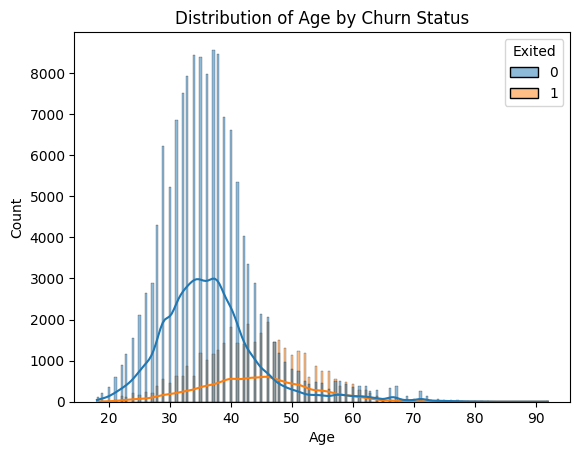

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example for 'Age' distribution
sns.histplot(data=df, x='Age', kde=True, hue='Exited')
plt.title('Distribution of Age by Churn Status')
plt.show()

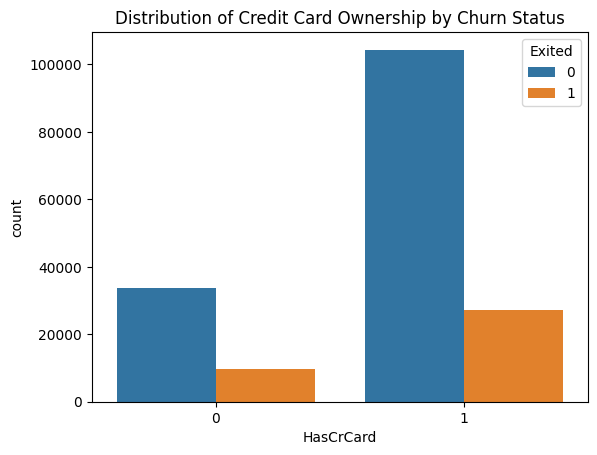

In [8]:
# HasCard distribution
sns.countplot(data=df, x='HasCrCard', hue='Exited')
plt.title('Distribution of Credit Card Ownership by Churn Status')
plt.show()

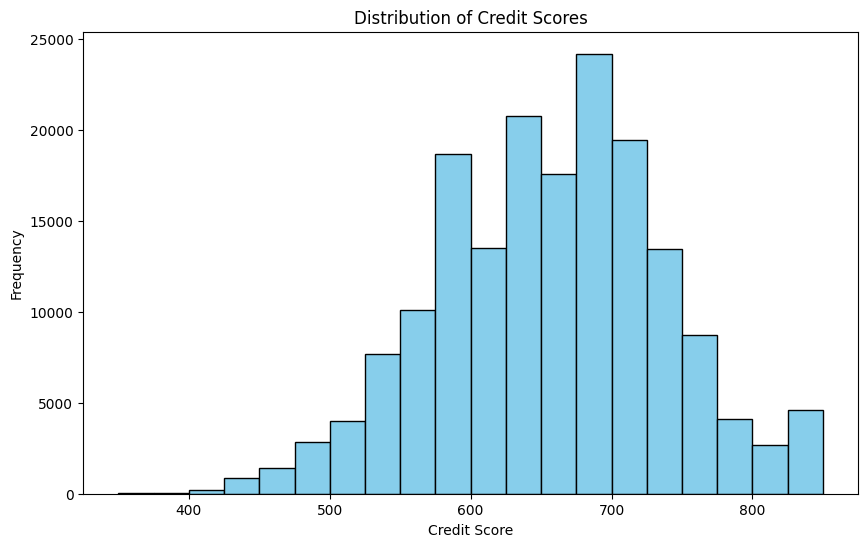

In [11]:
import matplotlib.pyplot as plt

# Plotting the histogram of Credit Scores
plt.figure(figsize=(10, 6))
plt.hist(df['CreditScore'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()


We can see from above that the most common credit score is slightly below 700 which is average.

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


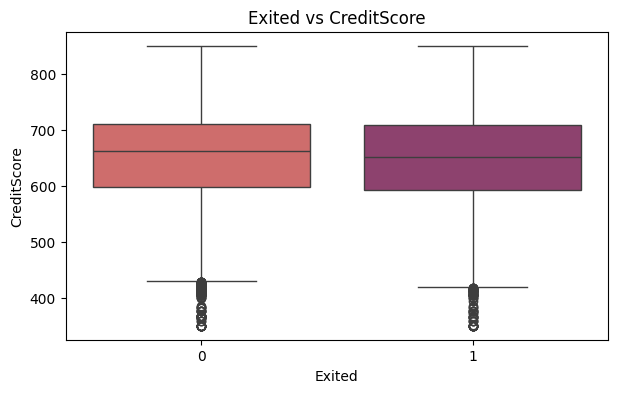

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


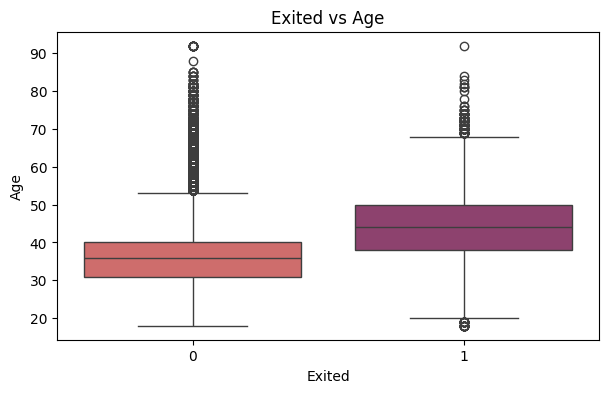

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


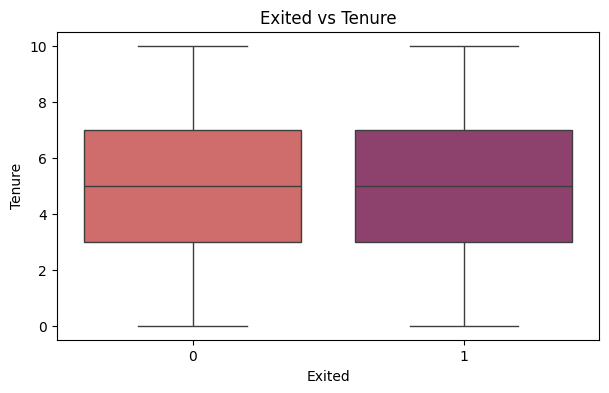

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


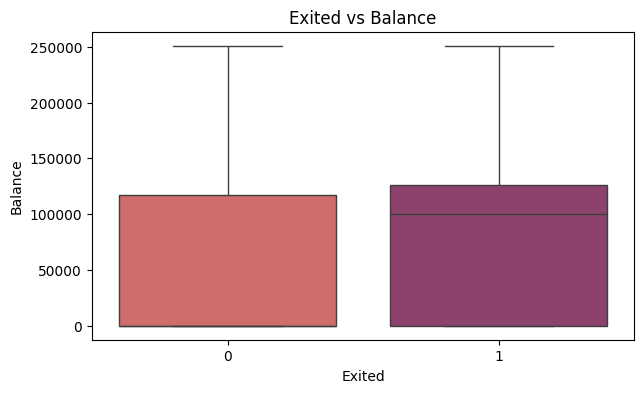

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


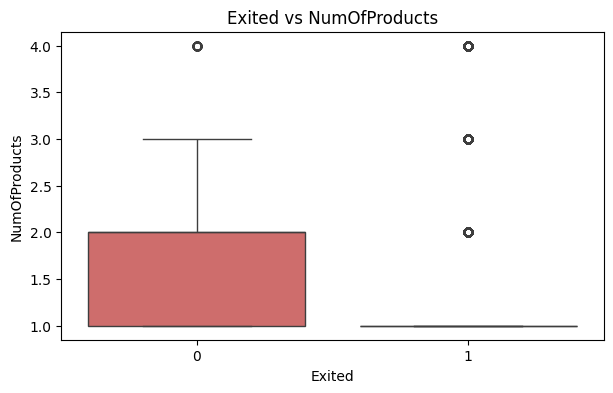

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


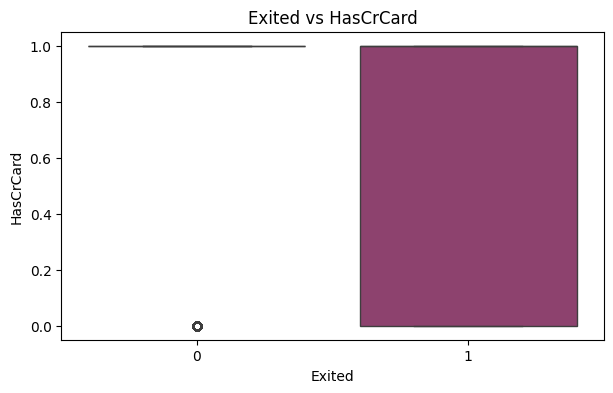

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


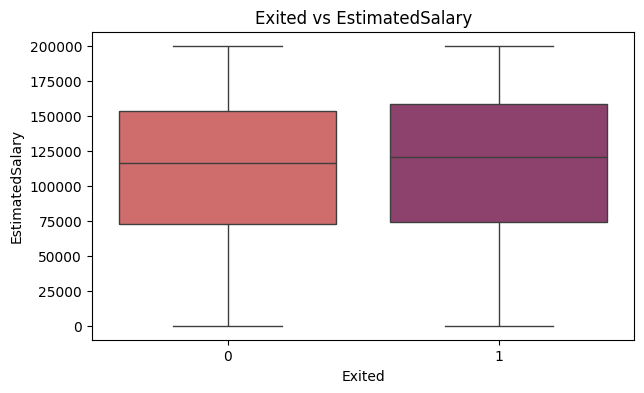

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


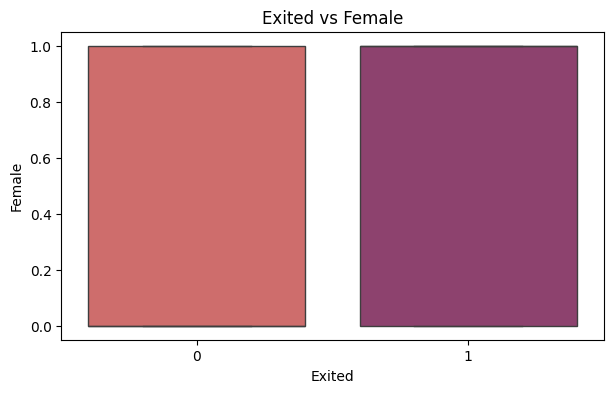

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


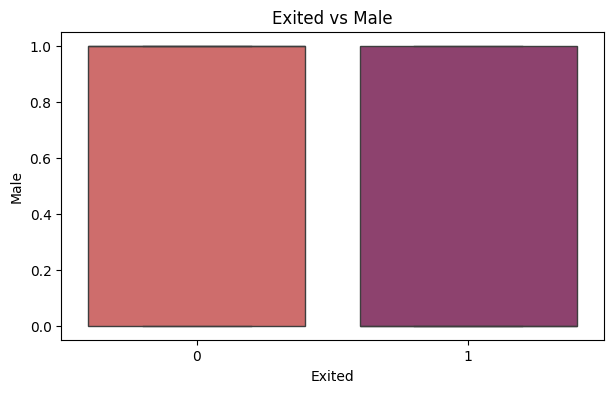

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


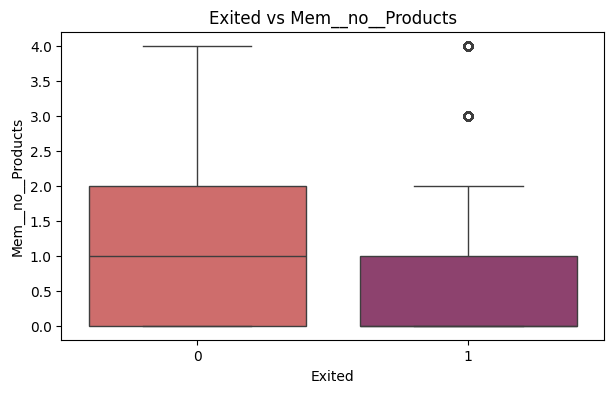

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


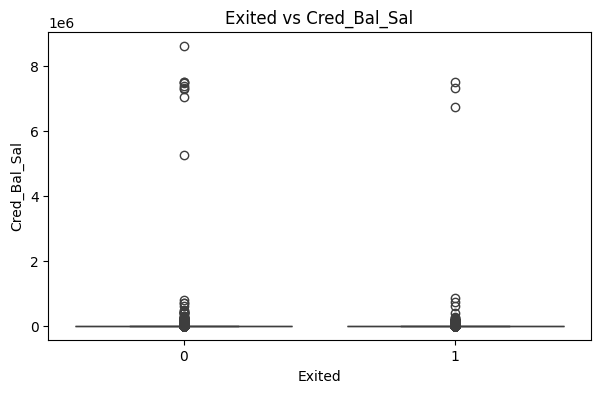

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


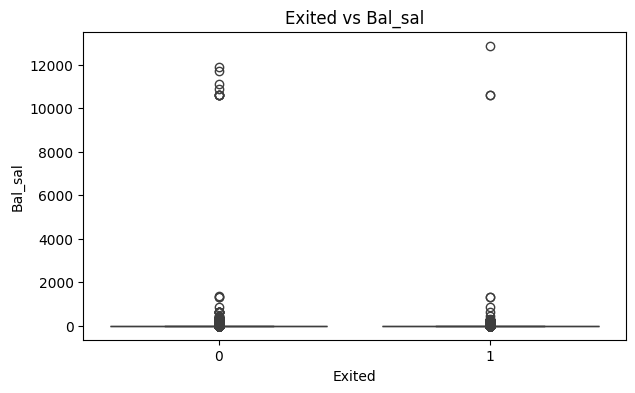

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


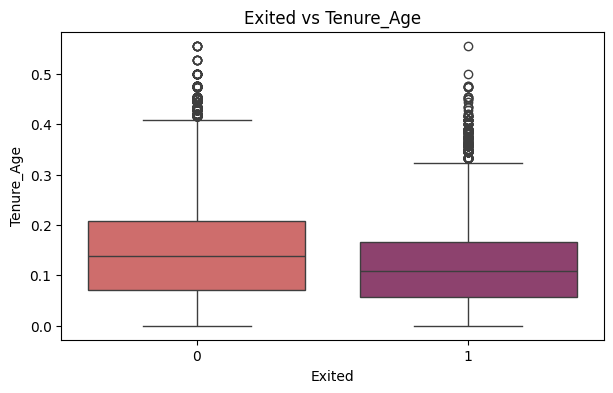

<ipython-input-12-9e48481b0394>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,x='Exited',y=col,palette='flare')


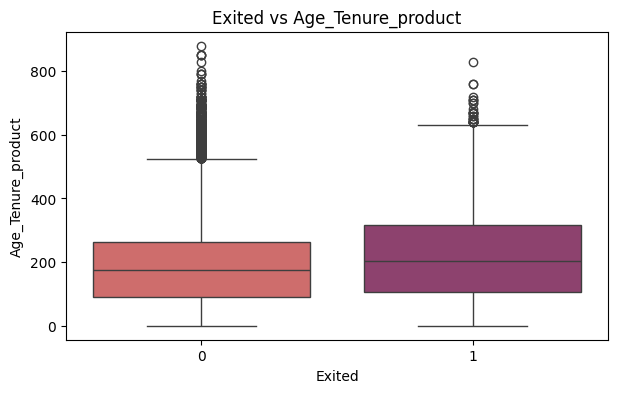

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

exclude_columns = ['Exited', 'Surname','IsActiveMember','Surname_tfidf_0','Surname_tfidf_1','Surname_tfidf_2','Surname_tfidf_3','Surname_tfidf_4','Germany','France','Spain']
for col in df.columns:
    if col not in exclude_columns:
        plt.figure(figsize=(7,4))
        sns.boxplot(df,x='Exited',y=col,palette='flare')
        plt.gca().set_title(f'Exited vs {col}')
        plt.show()

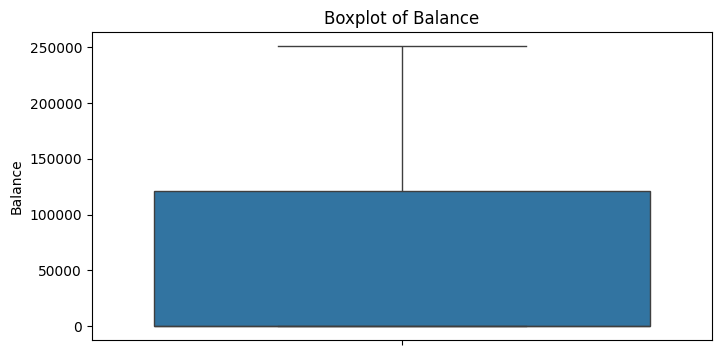

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Outlier detection for 'Age' using a boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(df['Balance'])
plt.title('Boxplot of Balance')
plt.show()



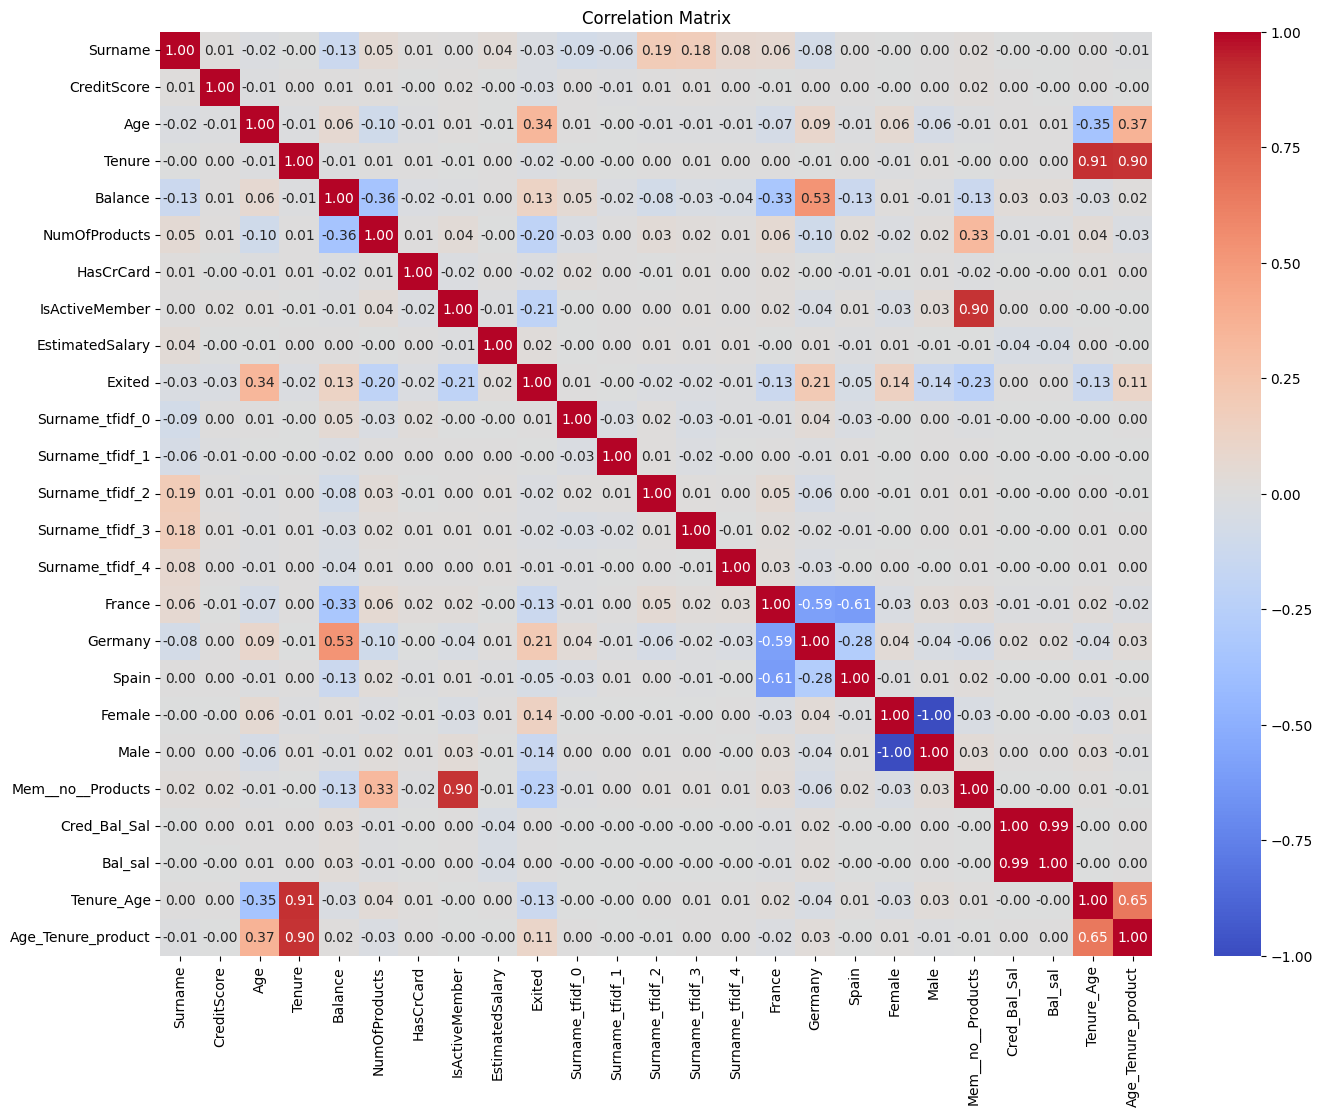

In [15]:
correlation_matrix = df.corr()

plt.figure (figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [33]:
#These correlations are more precise

import pandas as pd

# Calculate the correlation matrix
correlation_matrix = df.corr()

correlations_with_target = correlation_matrix['Exited']

correlations_with_target = correlations_with_target.drop('Exited')

# Sorted the correlations
correlations_with_target = correlations_with_target.sort_values(ascending=False)

# Display the correlations
print(correlations_with_target)


Age                   0.336603
Germany               0.208584
Balance               0.128391
Age_Tenure_product    0.107580
EstimatedSalary       0.018599
Surname_tfidf_0       0.005532
Bal_sal               0.003119
Cred_Bal_Sal          0.002884
Surname_tfidf_1      -0.000027
Surname_tfidf_4      -0.013617
Tenure               -0.019237
HasCrCard            -0.021127
Surname_tfidf_2      -0.021321
Surname_tfidf_3      -0.021356
Surname              -0.027023
CreditScore          -0.027252
Spain                -0.051319
France               -0.129092
Tenure_Age           -0.129918
Gender               -0.144147
NumOfProducts        -0.204525
IsActiveMember       -0.207201
Mem__no__Products    -0.227765
Name: Exited, dtype: float64


Addressing the Class Imbalance

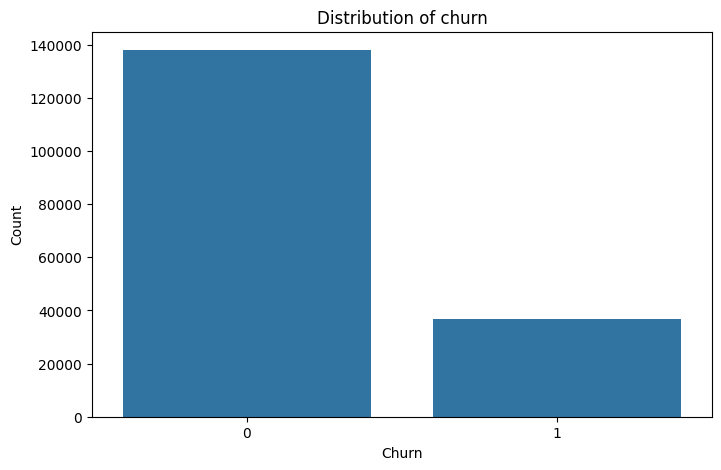

In [14]:
# Target Variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and 'Exited' is the target variable
X = df.drop('Exited', axis=1)
y = df['Exited']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)




Model Building

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Training the model on the balanced dataset
log_reg.fit(X_train_smote, y_train_smote)

# Predicting the test set results
y_pred = log_reg.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy: 0.6875964120436496
Confusion Matrix:
 [[19136  8479]
 [ 2457  4934]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.69      0.78     27615
           1       0.37      0.67      0.47      7391

    accuracy                           0.69     35006
   macro avg       0.63      0.68      0.63     35006
weighted avg       0.78      0.69      0.71     35006



Logistic Regression not very reliable

## ***Random Forest***

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initializing the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model on the balanced dataset
random_forest.fit(X_train_smote, y_train_smote)

# Predicting the test set results
y_pred_rf = random_forest.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


Random Forest Accuracy: 0.8549391532880077
Confusion Matrix:
 [[25789  1826]
 [ 3252  4139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     27615
           1       0.69      0.56      0.62      7391

    accuracy                           0.85     35006
   macro avg       0.79      0.75      0.77     35006
weighted avg       0.85      0.85      0.85     35006



### Overall Model Performance:

- **Accuracy**: 85.49%. This indicates that the model correctly predicts the outcome (churn or no churn) for 85.49% of the customers in the test set. It's a measure of the model's overall correctness across both classes.

### Class-specific Performance Metrics:

- **Precision** (Class 0 - Did Not Churn): 0.89. This means that when the model predicts a customer will not churn, it is correct 89% of the time.
- **Precision** (Class 1 - Churned): 0.69. This indicates that when the model predicts a customer will churn, it is correct 69% of the time.

- **Recall** (Class 0 - Did Not Churn): 0.93. This shows that the model correctly identifies 93% of the customers who did not churn.
- **Recall** (Class 1 - Churned): 0.56. This means the model correctly identifies 56% of the customers who actually churned.

- **F1-Score** (Class 0 - Did Not Churn): 0.91. The F1-score is a balance between precision and recall, and a score of 0.91 indicates a strong performance for the non-churn predictions.
- **F1-Score** (Class 1 - Churned): 0.62. The F1-score for churn predictions is lower, indicating a weaker balance between precision and recall for this class.

### Confusion Matrix:

- **True Negatives (TN)**: 25,789. These are customers who were correctly predicted not to churn.
- **False Positives (FP)**: 1,826. These are customers who were incorrectly predicted to churn (they did not churn).
- **False Negatives (FN)**: 3,252. These are customers who were incorrectly predicted not to churn (they did churn).
- **True Positives (TP)**: 4,139. These are customers who were correctly predicted to churn.

### Interpretation:

1. **High Precision for Non-Churn Predictions**: The model is very reliable in its predictions for customers who will not churn, with high precision and recall. This is indicative of the model's strength in identifying loyal customers.

2. **Challenges in Churn Prediction**: The model faces more difficulty accurately predicting churn, as seen by lower precision, recall, and F1-scores for the churn class. This suggests that while the model can identify some churn cases, it also misses quite a few (low recall) and incorrectly labels some customers as likely to churn when they do not (lower precision).

3. **Overall Model Bias**: The model tends to perform better in predicting non-churners compared to churners. This could be due to class imbalance or features that are more indicative of non-churning behavior.

4. **Strategic Implications**: For a business, these results suggest that while the model is a good tool for identifying customers likely to remain, it might require further tuning or additional features to better capture the nuances of customer churn. Improving recall for churned customers (reducing false negatives) could be a priority if the business aims to target interventions or retention strategies more effectively.

5. **Model Improvement Opportunities**: Consider exploring techniques to address class imbalance, feature engineering to capture more relevant predictors of churn, or experimenting with different models and hyperparameters to improve predictions for the churn class.

Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest model
rf = RandomForestClassifier()

# Initialize RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
rf_random.fit(X_train, y_train)

# Print the best parameters
print(rf_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True}


In [36]:
from sklearn.ensemble import RandomForestClassifier

# Best parameters from RandomizedSearchCV
best_params = {
    'n_estimators': 150,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_features': 'auto',
    'max_depth': 10,
    'bootstrap': True
}

# Initialize the RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    bootstrap=best_params['bootstrap'],
    random_state=42  # Ensure reproducibility
)

# Fit the model with the best parameters
rf_best.fit(X_train, y_train)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Random Forest Accuracy: 0.8549391532880077
Confusion Matrix:
 [[25789  1826]
 [ 3252  4139]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     27615
           1       0.69      0.56      0.62      7391

    accuracy                           0.85     35006
   macro avg       0.79      0.75      0.77     35006
weighted avg       0.85      0.85      0.85     35006



In [37]:
feature_importances = rf_best.feature_importances_


In [38]:
import numpy as np
features = X_train_smote.columns
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")

for f in range(X_train_smote.shape[1]):
    print(f"{f + 1}. feature {features[indices[f]]} ({importances[indices[f]]})")


Feature ranking:
1. feature Age (0.32688851909248395)
2. feature NumOfProducts (0.24967331526801145)
3. feature Mem__no__Products (0.10216344986618067)
4. feature IsActiveMember (0.06070902587056732)
5. feature Germany (0.053360664317432575)
6. feature Balance (0.029306196375550007)
7. feature Age_Tenure_product (0.027232965906483993)
8. feature Tenure_Age (0.02192283618061494)
9. feature Bal_sal (0.021139336554184887)
10. feature Cred_Bal_Sal (0.020128380530378735)
11. feature Female (0.01795037340282834)
12. feature Male (0.017326548065568343)
13. feature Surname (0.011224305726552329)
14. feature CreditScore (0.010998409710669855)
15. feature EstimatedSalary (0.01047197861623656)
16. feature France (0.009442350390285357)
17. feature Tenure (0.0056051166048982914)
18. feature Spain (0.004456227521072363)


I decided to drop some negative correlated products.

In [39]:
from sklearn.model_selection import train_test_split

# List of columns to be dropped
dropped_columns = ['Surname_tfidf_3', 'Surname_tfidf_4', 'Surname_tfidf_2', 'Surname_tfidf_1', 'Surname_tfidf_0', 'HasCrCard']

# Dropping the specified columns from the features
X = df.drop(dropped_columns + ['Exited'], axis=1)  # Including 'Exited' in the list to drop it as well
y = df['Exited']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Best parameters from RandomizedSearchCV
best_params = {
    'n_estimators': 150,
    'min_samples_split': 10,
    'min_samples_leaf': 4,
    'max_features': 'auto',
    'max_depth': 10,
    'bootstrap': True
}

# Initialize the RandomForestClassifier with the best parameters
rf_best = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    max_depth=best_params['max_depth'],
    bootstrap=best_params['bootstrap'],
    random_state=42  # Ensure reproducibility
)

# Fit the model with the best parameters
rf_best.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = rf_best.predict(X_test)

# Evaluating the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Confusion Matrix:\n", conf_matrix_rf)
print("Classification Report:\n", class_report_rf)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Random Forest Accuracy: 0.8627092498428841
Confusion Matrix:
 [[26443  1172]
 [ 3634  3757]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92     27615
           1       0.76      0.51      0.61      7391

    accuracy                           0.86     35006
   macro avg       0.82      0.73      0.76     35006
weighted avg       0.85      0.86      0.85     35006



### Previous Model Performance (Before Dropping Columns and Hyperparameter Tuning):
- **Accuracy**: 85.49%
- **Precision for Class 0 (Non-Churn)**: 0.89
- **Precision for Class 1 (Churn)**: 0.69
- **Recall for Class 0 (Non-Churn)**: 0.93
- **Recall for Class 1 (Churn)**: 0.56
- **F1-Score for Class 0 (Non-Churn)**: 0.91
- **F1-Score for Class 1 (Churn)**: 0.62

### Current Model Performance (After Dropping Columns and Hyperparameter Tuning):
- **Accuracy**: 86.27%
- **Precision for Class 0 (Non-Churn)**: 0.88
- **Precision for Class 1 (Churn)**: 0.76
- **Recall for Class 0 (Non-Churn)**: 0.96
- **Recall for Class 1 (Churn)**: 0.51
- **F1-Score for Class 0 (Non-Churn)**: 0.92
- **F1-Score for Class 1 (Churn)**: 0.61

### Major Differences:

1. **Improved Accuracy**: After dropping columns and tuning hyperparameters, the model's overall accuracy improved from 85.49% to 86.27%. This indicates a slight improvement in the model's ability to correctly predict both churn and non-churn cases.

2. **Precision and Recall Trade-offs**:
   - For Class 0 (Non-Churn), the precision slightly decreased from 0.89 to 0.88, but recall increased from 0.93 to 0.96, indicating the model became slightly better at identifying true non-churn cases at the expense of a minimal decrease in precision.
   - For Class 1 (Churn), precision increased from 0.69 to 0.76, showing a notable improvement in the model's ability to correctly identify churn cases when it predicts churn. However, recall decreased from 0.56 to 0.51, indicating the model became slightly less effective at identifying all true churn cases among the actual churned customers.

3. **F1-Score Stability**: The F1-scores for both classes remained relatively stable, with a slight decrease for the churn class from 0.62 to 0.61. The F1-score is a balance of precision and recall, and its stability suggests that the improvements in precision for the churn predictions were offset by decreases in recall.

### Summary of Changes:
- The primary improvements lie in the model's precision for predicting churn, indicating a higher correctness in its churn predictions after the adjustments.
- There's a slight trade-off observed where the model's recall for churn predictions decreased, meaning it missed more actual churn cases than before.
- The model became better at identifying non-churners, as seen in the increased recall for Class 0.

These changes highlight the delicate balance between precision and recall in model performance, especially in tasks like churn prediction where both identifying true positives (churn) and true negatives (non-churn) are important for business strategies. The slight improvements in accuracy and precision for churn predictions suggest that dropping less important features and hyperparameter tuning had a positive impact on the model's specificity and overall correctness, even if it slightly compromised the model's sensitivity (recall) for churn predictions.

**Decision Tree**

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initializing the Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Training the model on the balanced dataset
decision_tree.fit(X_train_smote, y_train_smote)

# Predicting the test set results
y_pred_dt = decision_tree.predict(X_test)

# Evaluating the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy:", accuracy_dt)
print("Confusion Matrix:\n", conf_matrix_dt)
print("Classification Report:\n", class_report_dt)


Decision Tree Accuracy: 0.7966634291264355
Confusion Matrix:
 [[23857  3758]
 [ 3360  4031]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87     27615
           1       0.52      0.55      0.53      7391

    accuracy                           0.80     35006
   macro avg       0.70      0.70      0.70     35006
weighted avg       0.80      0.80      0.80     35006



AUC: 0.8846966228457849


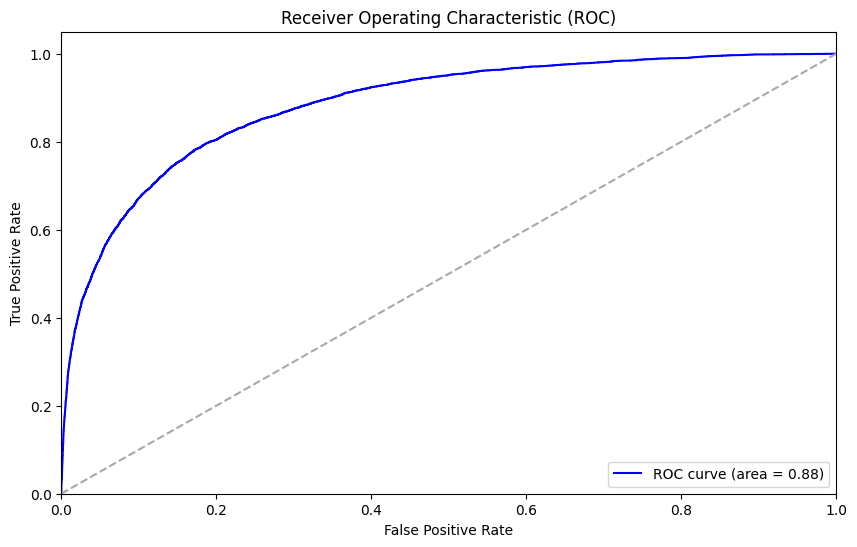

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Predict probabilities for the positive class
y_probs = rf_best.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Step 2: Calculate metrics for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Step 3: Calculate AUC
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc}")

# Step 4: Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In conclusion; I decided to go with the Original Random Forest as it had decent accuracy and a higher recall.

The Business cares more about churn which should be priority. The log regression did have a higher recall but the accuracy is not up to standard.